In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [142]:
Co60=pd.read_csv("./data/Co60_10minNaI.csv")
Na22=pd.read_csv("./data/Na22_10minNaI.csv")
Cs137=pd.read_csv("./data/Cs137_5minNaI.csv")

In [143]:
x=Co60.canal
y=Co60.cuentas

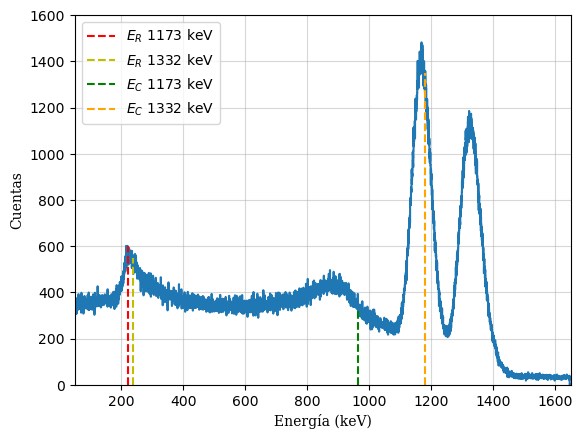

In [144]:
plt.plot(Ecanales,y,ds="steps-mid")
plt.xlim(50,1650)

plt.xlabel("Energía (keV)",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.ylim(0,1600)
plt.vlines(221.5,0,600,color="r",linestyles="dashed",label=r"$E_R$ 1173 keV ")
plt.vlines(237.6,0,550,color="y",linestyles="dashed",label=r"$E_R$ 1332 keV")
plt.vlines(963.3,0,330,color="g",linestyles="dashed",label=r"$E_C$ 1173 keV ")
plt.vlines(1181.1,0,1350,color="orange",linestyles="dashed",label=r"$E_C$ 1332 keV")
plt.legend(loc=2)
plt.grid(which='both',alpha=0.5)

In [145]:
def gaussiana(x,M,mu,sigma):
    return M*np.exp(-0.5*((mu-x)/(sigma))**2)
def fondo(x,b0,b1,mu):
    return b0+b1*(mu-x)

def gaussiana_experimental(x,M,mu,sigma,b0,b1):
    return fondo(x,b0,b1,mu)+gaussiana(x,M,mu,sigma)

def gaussiana_doble(x,M1,M2,mu1,mu2,sigma1,sigma2,b0,b1):
    return fondo(x,b0,b1,mu1)+gaussiana(x,M1,mu1,sigma1)+gaussiana(x,M2,mu2,sigma2)

In [146]:
fit2=curve_fit(gaussiana_doble,x[2500:3600],y[2500:3600],p0=[1200,1000,2900,3300,80,70,200,-0.22])

args2=fit2[0]
errorargs2=np.sqrt(np.diag(fit2[1]))
errorargs2
args2

array([1.21366294e+03, 1.00356509e+03, 2.87301525e+03, 3.25657886e+03,
       7.17636978e+01, 7.93975052e+01, 1.92494006e+02, 1.91351216e-01])

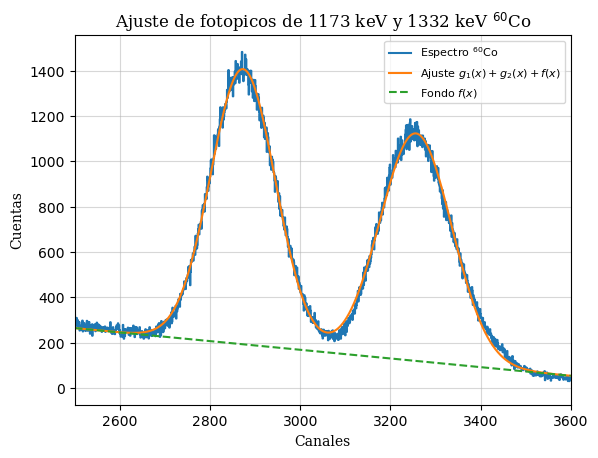

In [147]:
x2=np.linspace(2500,3600,10000)
y2=gaussiana_doble(x2,*args2)




plt.plot(x,y,ds="steps-mid",label=r"Espectro $^{60}$Co")
plt.plot(x2,y2,label=r"Ajuste $g_1(x)+g_2(x)+f(x)$")
plt.plot(x2,fondo(x2,1.92494006e+02, 1.91351216e-01,2.87301525e+03),linestyle="dashed",label=r"Fondo $f(x)$")
plt.xlim([2500,3600])
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Ajuste de fotopicos de 1173 keV y 1332 keV $^{60}$Co",family="serif")
plt.legend(fontsize=8)
plt.grid(which='both',alpha=0.5)

plt.show()

In [148]:
M1,M2,mu1,mu2,sigma1,sigma2,b0,b1=args2
print(f"mu1={mu1}")
print(f"mu2={mu2}")

mu1=2873.0152489044995
mu2=3256.578855585329


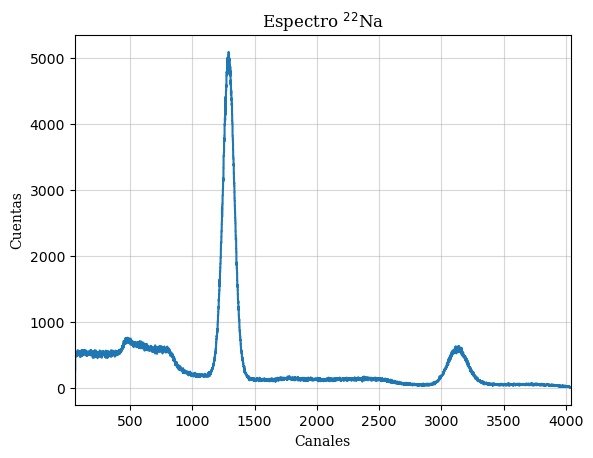

In [149]:
Na22x=Na22.canal
Na22y=Na22.cuentas
plt.plot(Na22x,Na22y,ds="steps-mid")
plt.xlim(55,4040)
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Espectro $^{22}$Na",family="serif")
plt.grid(which='both',alpha=0.5)

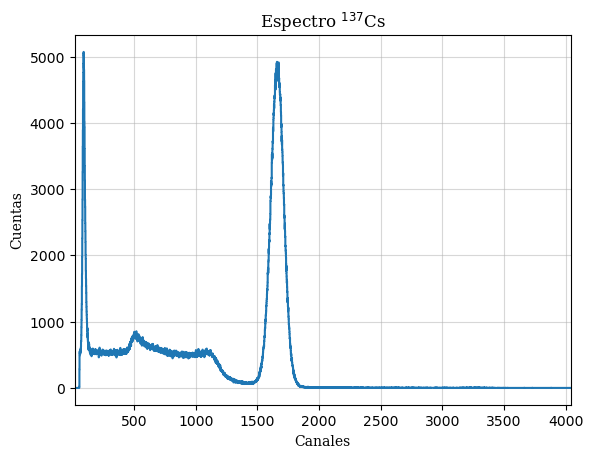

In [150]:
Cs137x=Cs137.canal
Cs137y=Cs137.cuentas
plt.plot(Cs137x,Cs137y,ds="steps-mid")
plt.xlim(20,4040)
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Espectro $^{137}$Cs",family="serif")
plt.grid(which='both',alpha=0.5)

In [151]:
energias=np.array([32.8,511,661.7,1173.2,1274.5,1332.5])
canales=np.array([93.28,1290.79,1661.56,2873.01,3132.70,3256.57])

In [152]:
def E(canal,a0,a1):
    return a1*canal+a0
fitE=curve_fit(E,canales,energias)
argsE=fitE[0]
errorargsE=np.sqrt(np.diag(fitE[1]))
Ecanales=E(x,*argsE)

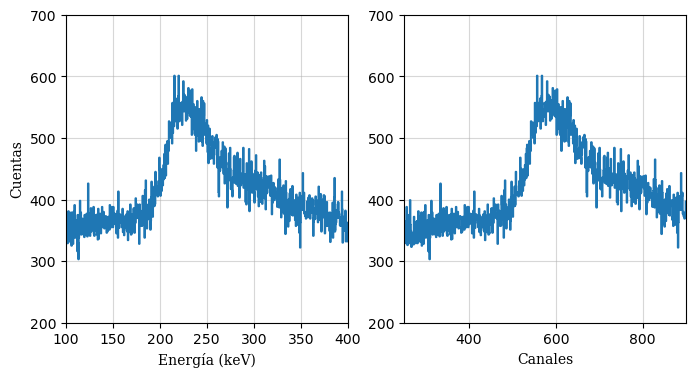

In [153]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(Ecanales,y,ds="steps-mid")
ax[0].set_xlabel("Energía (keV)",family="serif")
ax[0].set_ylabel("Cuentas",family="serif")
ax[0].set_xlim(100,400)
ax[0].set_ylim(200,700)
ax[0].grid(which='both',alpha=0.5)

ax[1].plot(x,y,ds="steps-mid")
ax[1].set_xlabel("Canales",family="serif")
ax[1].set_xlim(250,900)
ax[1].set_ylim(200,700)
ax[1].grid(which='both',alpha=0.5)

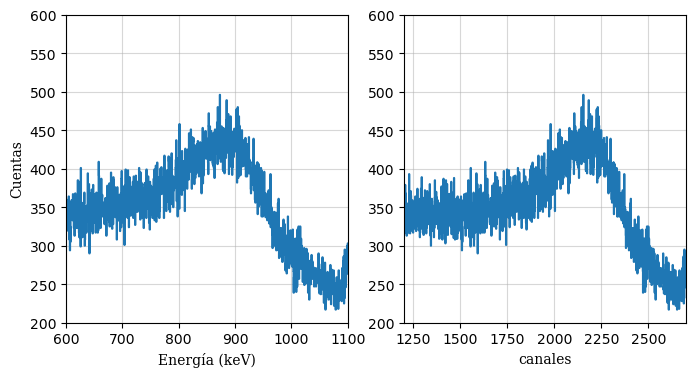

In [154]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(Ecanales,y,ds="steps-mid")
ax[0].set_xlabel("Energía (keV)",family="serif")
ax[0].set_ylabel("Cuentas",family="serif")
ax[0].set_xlim(600,1100)
ax[0].set_ylim(200,600)
ax[0].grid(which='both',alpha=0.5)

ax[1].plot(x,y,ds="steps-mid")
ax[1].set_xlabel("canales",family="serif")
ax[1].set_xlim(1200,2700)
ax[1].set_ylim(200,600)
ax[1].grid(which='both',alpha=0.5)

In [155]:
print(args2)
print(errorargs2)

[1.21366294e+03 1.00356509e+03 2.87301525e+03 3.25657886e+03
 7.17636978e+01 7.93975052e+01 1.92494006e+02 1.91351216e-01]
[3.1678909  3.07846341 0.20429249 0.26179133 0.23402575 0.31327295
 1.53904556 0.00317222]


In [156]:
from uncertainties import ufloat

In [157]:
B=ufloat(79.3,0.3)
2*np.sqrt(2*np.log(2))*B

186.73722957095427+/-0.7064460135092848

In [158]:
M=ufloat(1003,3)
sigma=ufloat(79.3,0.3)
area=M*sigma*np.sqrt(2*np.pi)
area

199371.949044773+/-961.5042479590248

In [159]:
def err(teo,exp):
    return 100*abs(teo-exp)/teo


In [160]:
err(237.6,225)

5.303030303030301